# ** 8 Financial Analysis**
파이썬을 활용한 금융분석

### **review Data Datum**
1. Datum(숫자, "문자"), Data([list], {dict}, (tuple,))
1. (기본/외부/사용자) 모듈, 함수, 메소드
1. []의 문자에서 활용( [index], [:slicing]), 함수를 활용{for : 반복, if :판단, enumerate() :순번 integer 출력}
1. 재무제표 Web Crawling ==> type 변경 ==> 시각화
1. ndarray, Series, Dataframe

### **review Series**
1. pd.Series( [ data ] , index = [ index ])
1. series 사칙연산
1. series [ Boolean 판단문 ]
1. series.index = [ list ]
1. series.isnull()
1. series.drop()

### **review DataFrame**
1. pd.DataFrame( { columns :  [ data ] , columns :  [ data ] } )
1. pd.to_datetime()
1. df.rename( columns = { 기존 column , 새로운 column } )
1. df.insert( 컬럼순서,  컬럼명 ,  data )
1. df.column이름 &nbsp; | &nbsp; df['column이름']
1. df [ index Slicing ]
1. df.iloc[ index slicing,  column slicing ]
1. df.reset_index()        :  index  -> column
1. df.set_index( '컬럼명' ) :  column -> index
1. df.sort_index()
1. df.sort_value()
1. df[ boolean 함수 ]
1. df[ boolean 함수 ].column이름
1. axis = 0 : index | axis = 1 : column
1. df.drop( 'index이름'  , axis = 0 )
1. df.drop( 'column이름' ,  axis = 1 )
1. df.index.tolist()
1. df.column.tolist()
1. df.apply(lambda x: x ** 2)  
1. pd.pivot_table(df,index = [], values = [], aggfunc = [], margins = True)

### **review DataFrame static**
1. .count()
1. .describe()
1. .min()     .max()
1. .idxmin()  .idxmax()
1. .quantile()   
1. .sum()
1. .mean()    .median()
1. .var() 분산 .std() 정규분산
1. .cumsum()  .cumprod()  누적 합    누적 곱
1. .cummin()  .cummax()   누적최소값, 누적최대값

### **review Series & DataFrame 결측치 제어하기**
1. df.dropna()
1. df.fillna(method='ffill',  limit=2)  # 결측치 대체
1. df.fillna(df.mean()['컬럼명'])   
1. Series.interpolate(method='time')    # 결측치 보간 (시계열적 특성을 부여가능)
1. Series.interpolate(method='values', limit=1, limit_direction='backward') # 'forward','backward','both'

### **review &nbsp; map, reduce, lambda, filter**
1. map & lambda : map(lambda x : str(x), [list])
1. map & lambda : list(map(lambda x : str(x), [list]))
1. map & lambda : <strike>[ map(lambda x : str(x), data) ]</strike>
1. Series & lambda : Series.apply(lambda x : str(x))
1. filter & lambda : list(filter(lambda x : x % 2 == 0,  data))
1. <strike>filter</strike> & DataFrame : DataFrame[ Series % 2 == 0 ]
1. reduce & lambda : reduce(lambda x, y: x+y, [1, 2, 3, 4, 5])      # 데이터 차원축소

### **review &nbsp; TimeSeries**
1. from datetime import datetime
1. pandas.date_range(end = '2017-07-01', periods=30, freq='BM')  
1. pandas.date_range('2017/8/8 09:09:09', periods=5, normalize=True)
1. [str(date.date()) &nbsp;&nbsp; for &nbsp;&nbsp; date &nbsp;&nbsp; in &nbsp;&nbsp; pd.date_range('2017/01/01', '2017/01/11')]

### **review &nbsp; Matplotlib**
1. DataFrame.loc['시작날짜':'종료날짜', :] : 주소 이름을 활용하여 인덱싱
1. DataFrame.iloc[1:10, : ] # 주소값으로 인덱싱
1. Series.plot(kind='line')  **# 'bar'**
1. Series.resample().plot()
1. Series.rolling().plot()
1. Series.ix['2018-01':'2018-03'].plot()
1. plt.figure(figsize=(,)); &nbsp;&nbsp; plt.plot(x축,y축,lw=1.5,label=); &nbsp;&nbsp; plt.legend(loc=); &nbsp;&nbsp; plt.show()
1. plt.figure(figsize=(,)); &nbsp;&nbsp; plt.subplot(121); &nbsp;&nbsp; plt.plot(); &nbsp;&nbsp; plt.subplot(122); &nbsp;&nbsp; plt.plot(); &nbsp;&nbsp; plot.show()


### **review &nbsp; bs4**
1. soup = BeautifulSoup(html_doc, 'lxml')
1. soup.tags.attrs &nbsp; | &nbsp; soup.tags.attrs() 
1. soup.tags.contents
1. soup.tags.string.replacewith()
1. soup.find('tag명') &nbsp; | &nbsp; soup.find_all('tag명')
1. soup.find_all('a')[0].get_text()
1. soup.find_all('태그',{'class':"클래스 속성"})
1. soup.find_all('태그', {'class':re.compile('속성명 일부')})
1. soup.body.descendants &nbsp; | &nbsp; soup.p.string.parent

### **review &nbsp; lxml**
1. XPath 는 'query language'로써 XML의 nodes 들을 선택하는데 용이
1. **'\\'** 와 **'\\\\'** 의 기능을 구분
1. from &nbsp; lxml.html &nbsp; import &nbsp; fromstring
1. fromstring(response.text).xpath("/html/body/div/h1")[0]

### **Notes Numpy**
1. np.linspace()   : 시작점과 끝점을 균일 간격으로 나눈 점들을 생성
1. from scipy import stats
1. slope, intercept, r_value, p_value, std_err = stats.linregress(x,np.polyval(reg, x))

<br><br>
## **1 금융공학 맛보기**
회귀법 regression (Approximation (근사법))

<br>
### **01 금융데이터 불러오기**
KT등 일정한 패턴을 갖는 기업을 대상으로 한다

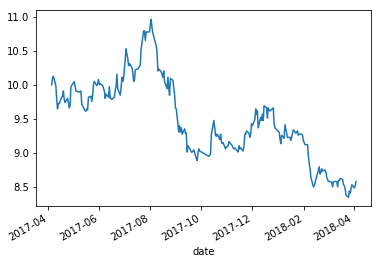

In [11]:
import numpy as np
from googlefinance.get import get_data
stock = get_data('KRX:030200','1Y')

%matplotlib inline
stock = stock.close
stock = (stock / stock[0] * 10)  
stock.plot()

<br>
### **02 선형 회귀식 추출**
numpy

In [12]:
import numpy as np
x   = [x  for x in range(len(stock))]
reg = np.polyfit(x, stock, deg = 1)     # 1차항 선형회귀식 (7,8,9 결과값이 모두 다르다)
ry  = np.polyval(reg, x)              # 회귀식 적용결과값 출력

print('''reg (bias, sloop) : {}
       \nry (회귀식 결과) : \n{}'''.format(reg, ry[:10]))

reg (bias, sloop) : [-6.51296330e-03  1.02731556e+01]
       
ry (회귀식 결과) : 
[10.27315564 10.26664268 10.26012971 10.25361675 10.24710379 10.24059082
 10.23407786 10.2275649  10.22105193 10.21453897]


일치확인 : False 
MSE(평균제곱오차) : 0.147922026065281


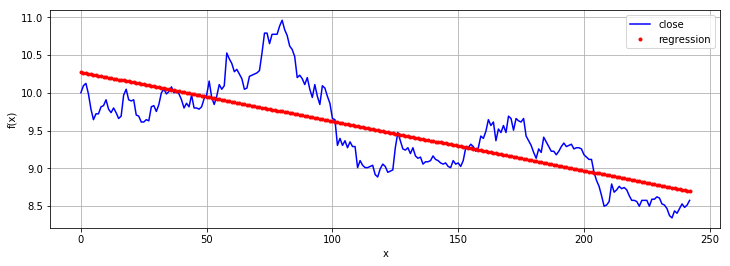

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(x,  stock,  'b',  label='close')        # sin() 그래프
plt.plot(x,  ry,     'r.',  label='regression')  # np.polyfit() 회귀식 그래프
plt.legend(loc=0); plt.grid(True); plt.xlabel('x'); plt.ylabel('f(x)')

# 모델의 검증 및 Cost 계산
print('일치확인 : {} \nMSE(평균제곱오차) : {}'.format(
    np.allclose(stock, ry), np.sum((stock - ry) ** 2) / len(x)))

In [14]:
# 종합된 함수로 정의한다
def stock_regression(stock, deg = 1):
    import numpy as np
    import matplotlib.pyplot as plt

    x   = [x  for x in range(len(stock))]
    reg = np.polyfit(x, stock, deg)       # 1차항 선형회귀식 (7,8,9 결과값이 모두 다르다)
    #reg = np.linalg.lstsq(x, stock)[0]    # lstsq (least square) : 최소 자승(Least Square)의 해결
    ry  = np.polyval(reg, x)              # 회귀식 적용결과값 출력

    plt.figure(figsize=(8,3))
    plt.plot(x,  stock,  'b',  label='close')        # sin() 그래프
    plt.plot(x,  ry,     'r.',  label='regression')  # np.polyfit() 회귀식 그래프
    plt.legend(loc=0); plt.grid(True); plt.xlabel('x'); plt.ylabel('f(x)')

    # 모델의 검증 및 Cost 계산
    print('reg (bias, sloop) : {} \n일치여부 : {} \nMSE(평균제곱오차) : {}'.format(
           reg, np.allclose(stock, ry), np.sum((stock - ry) ** 2) / len(x)))

reg (bias, sloop) : [ 2.75021950e-07 -1.30289267e-04  1.05013807e-02  9.78463230e+00] 
일치여부 : False 
MSE(평균제곱오차) : 0.12439478561958203


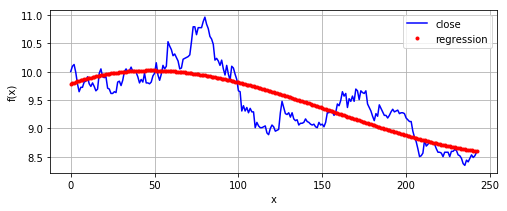

In [15]:
stock_regression(stock, 3)

reg (bias, sloop) : [ 3.49806435e-12 -2.62647349e-09  7.42758184e-07 -9.71937822e-05
  5.72737747e-03 -1.23149175e-01  1.04090440e+01] 
일치여부 : False 
MSE(평균제곱오차) : 0.053957417812052676


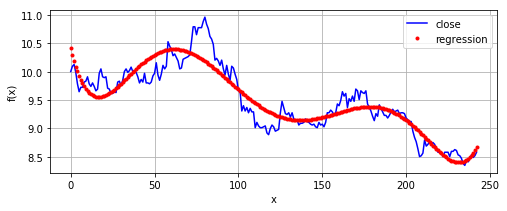

In [16]:
stock_regression(stock, 6)

<br><br>
### **03 개별 기저함수를 활용한 최소 자승 최적화**
np.linalg.lstsq(matrix.T, f(x))[0]
1. https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html
1. https://www.slideshare.net/eiaserinnys/ss-77814756
1. **고차원 다항식( 4 X 50 )** 을 활용한, 잔차를 최소로 하는 회귀식

reg : [6.33395016e-13 1.00000000e+00 3.76088050e-15 0.00000000e+00]
ry  : (243,)
일치확인 : True 
MSE(평균제곱오차) : 7.51668223661604e-27


/home/markbaum/Python/django/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


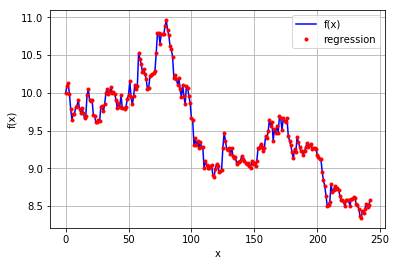

In [18]:
# Matrix에 다양한 기저함수를 활용
matrix = np.zeros((3 + 1, len(stock)))
matrix[3, :] = stock ** 3
matrix[2, :] = stock ** 2
matrix[1, :] = stock
matrix[0, :] = 1

reg = np.linalg.lstsq(matrix.T, stock)[0]      # lstsq (least square) : 최소 자승(Least Square)의 해결
ry  = np.dot(reg, matrix)                      # 최소자승법 결과에 matrix를 적용한 결과를 출력 (np.dot(벡터 내적의 합))
print('reg : {}\nry  : {}'.format(reg, ry.shape))

plt.plot(x, stock,  'b',  label='f(x)')        # sin() 그래프
plt.plot(x,   ry,  'r.',  label='regression')  # np.dot() 회귀식 연산결과
plt.legend(loc=0); plt.grid(True); plt.xlabel('x'); plt.ylabel('f(x)')

# 모델의 검증 및 Cost 계산
print('일치확인 : {} \nMSE(평균제곱오차) : {}'.format(
    np.allclose(stock, ry), np.sum((stock - ry) ** 2) / len(x)))
# 과적합 모델이 생성된다

<br>
### **03 Sin 회귀식 추출**
numpy

reg : [-1.92808735e-14  1.00000000e+00 -1.11022302e-16  3.44234190e-17]
ry  : (243,)
일치확인 : True 
MSE(평균제곱오차) : 1.2832916513476825e-27


/home/markbaum/Python/django/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


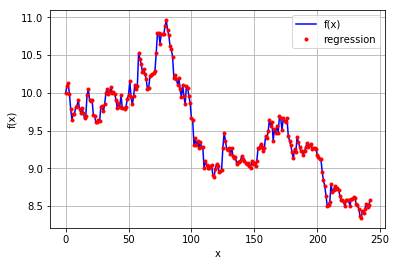

In [20]:
matrix[3, :] = np.sin(x)
reg = np.linalg.lstsq(matrix.T, stock)[0]  # matrix.T : 전치행렬
ry = np.dot(reg, matrix)
print('reg : {}\nry  : {}'.format(reg, ry.shape))

plt.plot(x, stock, 'b', label='f(x)')
plt.plot(x, ry,  'r.', label='regression')
plt.legend(loc=0)
plt.grid(True); plt.xlabel('x'); plt.ylabel('f(x)')

# 모델의 검증 및 Cost 계산
print('일치확인 : {} \nMSE(평균제곱오차) : {}'.format(
    np.allclose(stock, ry), np.sum((stock - ry) ** 2) / len(x)))

<br><br>
## **2 실제 금융데이터 정규성 분석**
통계분석

<br>
### **01 주가정보 수집**
주가 데이터를 Log 수익률 정보로 변환

In [1]:
from googlefinance.get import get_data
codes = ['KRX:005930','KRX:000660','NYSE:GM','NYSE:KO']
data = get_data(codes, period='7Y')
data.head(3)

,Code,open,high,low,close,volume
date,,,,,,
2011-04-06,KRX:005930,940000.0,942000.0,915000.0,923000.0,546992
2011-04-07,KRX:005930,925000.0,935000.0,905000.0,909000.0,425569
2011-04-08,KRX:005930,911000.0,914000.0,895000.0,898000.0,515313


In [2]:
import pandas as pd
result = []
for code in codes:
    temp = data[data.Code == code ].close
    temp.name = code
    result.append(temp)
data = pd.concat(result, axis=1)
data = data.dropna()
data.head(3)

,KRX:005930,KRX:000660,NYSE:GM,NYSE:KO
date,,,,
2011-04-06,923000.0,32500.0,32.87,33.74
2011-04-07,909000.0,32000.0,32.87,33.82
2011-04-08,898000.0,31300.0,32.31,33.72


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1330 entries, 2011-04-06 to 2018-04-04
Data columns (total 4 columns):
KRX:005930    1330 non-null float64
KRX:000660    1330 non-null float64
NYSE:GM       1330 non-null float64
NYSE:KO       1330 non-null float64
dtypes: float64(4)
memory usage: 52.0 KB


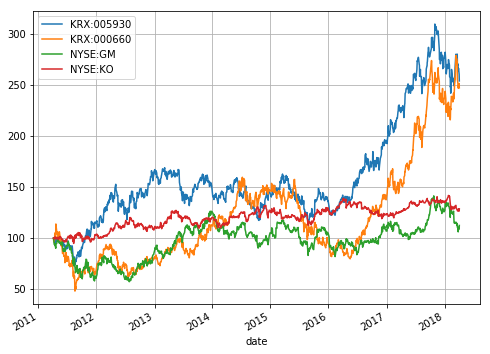

In [4]:
# 시초값을 100으로 정규화
%matplotlib inline
(data / data.iloc[0] * 100).plot(figsize=(8, 6), grid=True)

<br>
### **02 histogram 정규성 분석**
Log 수익률 분석 numpy.log()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fafd49c2860>,
      dtype=object)

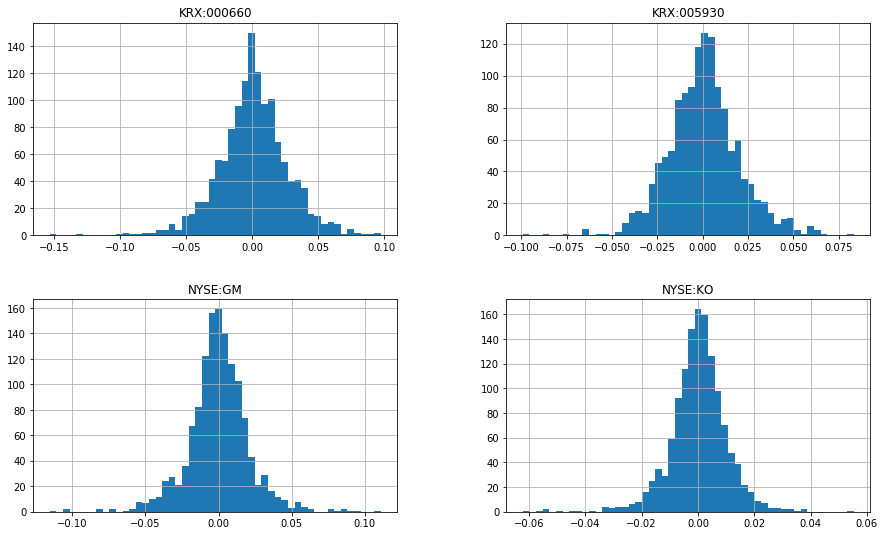

In [5]:
import numpy as np
# 수익률은 Numpy 보다, Pandas의 .shift(1)(데이터 index를 1개씩 미룸)가 더 편리하다
data_log = np.log(data / data.shift(1))  
# 개별 종목들의 Log 수익률 분포를 히스토그램으로 변환
data_log.hist(bins=50, figsize=(15, 9))

In [6]:
# 정규성 통계적 분석
def print_statistics(array):    
    import scipy.stats as scs
    sta = scs.describe(array)   # scs.describe() 결과를 보기좋게 재정렬
    print("%14s %15s" % ('statistic', 'value'),'\n', 30 * "-")
    print("%14s %15.5f" % ('크기(size)', sta[0]))
    print("%14s %15.5f" % ('최소(min)', sta[1][0]))
    print("%14s %15.5f" % ('최대(max)', sta[1][1]))
    print("%14s %15.5f" % ('평균(mean)', sta[2]))
    print("%14s %15.5f" % ('표준편차(std)', np.sqrt(sta[3])))
    print("%14s %15.5f" % ('왜도(skew)', sta[4]))
    print("%14s %15.5f" % ('첨도(kurtosis)', sta[5]))

In [7]:
# 개별 종목에 대한 정규성 분석
for code in codes:
    print("\nResults for symbol %s" % code)
    log_data = np.array(data_log[code].dropna())
    print_statistics(log_data)


Results for symbol KRX:005930
     statistic           value 
 ------------------------------
      크기(size)      1329.00000
       최소(min)        -0.09913
       최대(max)         0.08331
      평균(mean)         0.00070
     표준편차(std)         0.01960
      왜도(skew)         0.06980
  첨도(kurtosis)         1.49472

Results for symbol KRX:000660
     statistic           value 
 ------------------------------
      크기(size)      1329.00000
       최소(min)        -0.15344
       최대(max)         0.09725
      평균(mean)         0.00068
     표준편차(std)         0.02649
      왜도(skew)        -0.28403
  첨도(kurtosis)         2.09162

Results for symbol NYSE:GM
     statistic           value 
 ------------------------------
      크기(size)      1329.00000
       최소(min)        -0.11544
       최대(max)         0.11069
      평균(mean)         0.00009
     표준편차(std)         0.02102
      왜도(skew)        -0.02550
  첨도(kurtosis)         3.63877

Results for symbol NYSE:KO
     statistic           value 
 ------

<br>
### **03 Q-Q plot을 활용한 정규성 분석**
numpy

/home/markbaum/Python/django/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


KRX:000660


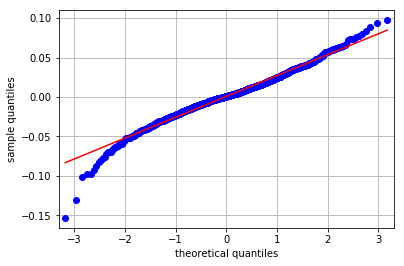

In [8]:
# DAX 지수 로그 수익률을 Q-Q plot 으로 시각화
no = 1
import statsmodels.api as sm
sm.qqplot(data_log[codes[no]].dropna(), line='s')
print(codes[no])

import matplotlib.pyplot as plt
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
plt.grid(True)
# 양쪽의 이상치 outlier 들이 정규분포보다 양수/ 음수인 경우를 반영한 결과이다
# 시계열 데이터의 경우 Fat tail 현상을 나타난다

<br></br>
## **3 포트폴리오 최적화**
Portfolio Optimization (Markowitz, Harry) [DataScience 주피터 원본](https://datascienceschool.net/view-notebook/4135681c2cf1474684cc63f1303fa6c7)

1. 기말 자산가치의 분포의 설명을 위한 <strong>'이차원 형태의 효용성 함수(utility function)'</strong>를 정의하고 있다면
1. **수익률은 평균과 분산**만으로 완벽하게 설명이 가능하다

<br>
### <strong>01 자료분석
**몬테카를로 시뮬레이션**을 활용하여 일간 수익률 및 공분산 확인
1. **weights** {array : 0 ~ 1} : 포트폴리오 내 증권의 비율  
1. **pret** {float:} : 포트폴리오 기대값, 수익률  
1. **pvol** {float:} : 기댓값 변동성
1. **pret / pvol** : 샤프지수

<img src="https://upload.wikimedia.org/wikipedia/commons/8/84/Pi_30K.gif" align='left' width=300>

In [9]:
# from googlefinance.get import get_data
# codes = ['KRX:005930','KRX:000660','NYSE:GM','NYSE:KO']
# data = get_data(codes, period='7Y', output= 'close')
# data = data.dropna()

# %matplotlib inline
# (data / data.iloc[0] * 100).plot(figsize=(8, 5), grid=True)

# 연간 일수를 252일로, 전체 수익률을 연율화 한다
# import numpy as np
# data_log = np.log(data / data.shift(1))
print('''log (연간) 수익률 평균  :\n{}\n
        \n투자자산에 대한 공분산  :\n{}'''.format( data_log.mean()*252 , data_log.cov()*252 ))

log (연간) 수익률 평균  :
KRX:005930    0.176881
KRX:000660    0.171749
NYSE:GM       0.022135
NYSE:KO       0.047653
dtype: float64

        
투자자산에 대한 공분산  :
            KRX:005930  KRX:000660   NYSE:GM   NYSE:KO
KRX:005930    0.096844    0.053502  0.025032  0.009743
KRX:000660    0.053502    0.176834  0.021101  0.006342
NYSE:GM       0.025032    0.021101  0.111371  0.018750
NYSE:KO       0.009743    0.006342  0.018750  0.026730


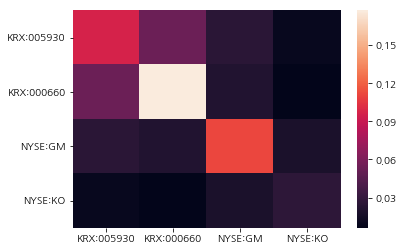

In [10]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', family='NanumGothic')
sns.heatmap(data_log.cov() * 252)
plt.show()

In [11]:
# cf) 특정기간의 연간 수익률을 계산후 출력한다
data_log_year = data_log['2015-01-01':'2016-01-01']
print(data_log_year.mean() * len(data_log_year))
print(data_log_year.cov()  * len(data_log_year))

KRX:005930   -0.051809
KRX:000660   -0.440089
NYSE:GM      -0.002894
NYSE:KO       0.019638
dtype: float64
            KRX:005930  KRX:000660   NYSE:GM   NYSE:KO
KRX:005930    0.065394    0.017857  0.010648  0.005580
KRX:000660    0.017857    0.125047  0.004257  0.004285
NYSE:GM       0.010648    0.004257  0.058568  0.016829
NYSE:KO       0.005580    0.004285  0.016829  0.021288


<br><br>
### **02 포트폴리오 계산을 위한 파라미터 생성**
주식의 **연간 Log 수익률** 값을 근거로
1. $ \mu_p $ (포트폴리오 <strong>전체 기대수익률</strong>) : $ \mu_p = E(\Sigma_i w_i r_i) = w^T \mu$
1. $ \sigma_p^2$ (포트폴리오 <strong>분산의 기댓값</strong>) : $ \sigma_p^2 = E((r-\mu)^2) = w^T \Sigma w $
1. $ \sqrt{\sigma_p^2} $ : 포트폴리오의 <strong>표준편차(변동성)</strong>
1. $ SR = \frac{\mu_p - r_f}{\sigma_p} $<strong>샤프지수(Sharp Ratio)</strong> : 포트폴리오 <strong>초과 수익 기댓값</strong> / 포트폴리오 <strong>표준편차 기댓값</strong>

In [12]:
# 기초이론 (The Basic Theory)
# 포트폴리오 종목별 비중값 : 총합이 1인, 6개의 난수를 생성
weights  = np.random.random(len(data.columns)) # 임의의 랜덤숫자를 추출
weights /= np.sum(weights)                     # 랜덤숫자 총합을 1로 정규화

print('''종목비중 \t\t   : {}
포트폴리오 기대수익률 (평균) : {:.5f}
포트폴리오 분산 기댓값 : {:.5f} 
표준편차(변동성)      : {:.5f}'''.format(
      weights, 
      np.sum(data_log.mean() * weights) * 252,
      np.dot(weights.T, np.dot(data_log.cov() * 252, weights)),
      np.sqrt(np.dot(weights.T, np.dot(data_log.cov() * 252, weights)))))

종목비중 		   : [0.17780536 0.00900626 0.39775996 0.41542842]
포트폴리오 기대수익률 (평균) : 0.06160
포트폴리오 분산 기댓값 : 0.03686 
표준편차(변동성)      : 0.19198


In [13]:
# 수익 변동성을 "몬테카를로 시뮬레이션"으로 확인 
prets = []   # 포트폴리오 기대값/수익률
pvols = []   # 기댓값 변동성
for p in range (2500):
    weights = np.random.random(len(data.columns))
    weights /= np.sum(weights)
    prets.append(np.sum(data_log.mean() * weights) * 252)  # 표준편차 : 포트폴리오 예상수익
    pvols.append(np.sqrt(np.dot(weights.T,                 
                 np.dot(data_log.cov() * 252, 
                 weights))))  
prets, pvols = np.array(prets), np.array(pvols)

<br><br>
### **03 포트폴리오 수익률 시뮬레이션**
matplotlib

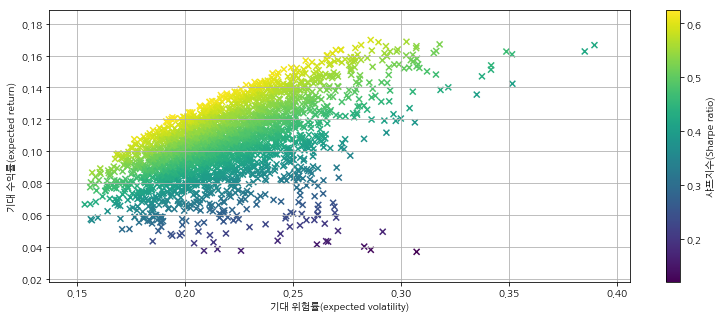

In [14]:
# 샤프지수 (pret / pvol) : 무위험 단기 이자율에 대한 포트폴리오의 초과 수익률 기댓값 
# 동일한 위험에 대한 투자수익 기댓값으로, 편차 한 단위당 초과수익(위험 프리미엄) 측정 값
plt.figure(figsize=(13, 5))
plt.scatter(pvols, prets, c = prets/pvols, marker='x')
plt.colorbar(label='샤프지수(Sharpe ratio)')  
plt.xlabel('기대 위험률(expected volatility)')
plt.ylabel('기대 수익률(expected return)')
plt.grid(True)

# 결과해석 샤프지수값이 큰 부분은 

<br><br>
### **04 opts : 변동성 최소의 포트폴리오**
1. Portfolio Optimizations (MSE등의 예측 오차값이 가장 작은 데이터 값을 찾는 알고리즘)
1. **샤프지수 최대화** 최적 분산비율
1. **Log 분산비율 초소화** 최적 분산비율

In [15]:
# 1. 포트폴리오 통계값을 생성하는 사용자 함수
def statistics(weights, display=False):
    weights = np.array(weights)                 
    pret = np.sum(data_log.mean() * weights) * 252  
    pvol = np.sqrt(np.dot(weights.T, np.dot(data_log.cov() * 252, weights))) 
    if display:
        print("""수익률 기댓값(pret):{:.3}\n변동성 기댓값(pvol):{:.3}\n샤프지수(SR) : {:.3}""".format(
        pret, pvol, pret/pvol))
        return
    return np.array([pret, pvol, pret/pvol])  

# 2. 최적화 함수 : 음수의 샤프지수값을 사용하여 부등호 제약조건과 변수범위 제약조건시 최소화 문제를 해결한다
def min_func_sharpe(weights):
    return -statistics(weights)[-1]

In [16]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})   # 변수의 총합은 1
bnds = tuple((0, 1) for x in range(len(data.columns)))     # 입력값은 0 ~ 1 사이 값  

# 3. 'SLSQP'를 적용한 최적의 포트폴리오 구성모델 생성
import scipy.optimize as sco
opts = sco.minimize(min_func_sharpe, 
                    len(data.columns) * [1. / len(data.columns),], 
                    method = 'SLSQP',
                    bounds = bnds, 
                    constraints = cons)

print("input para : {} \n입력초기값 : {} \n최적 분산비율 : {}".format(
    bnds, 
    len(data.columns) * [1. / len(data.columns),],
    opts['x'].round(3)))

input para : ((0, 1), (0, 1), (0, 1), (0, 1)) 
입력초기값 : [0.25, 0.25, 0.25, 0.25] 
최적 분산비율 : [0.468 0.161 0.    0.371]


In [17]:
# 위 구성비율을 적용한 통계치 결과값
statistics(opts['x'], display=True)

수익률 기댓값(pret):0.128
변동성 기댓값(pvol):0.204
샤프지수(SR) : 0.628


<br><br>
### **05 optv : 분산 최소화 포트폴리오 **
1. **샤프지수 최대화** 최적 분산비율
1. **Log 분산비율 초소화** 최적 분산비율

In [18]:
# 최적화 함수 : 분산을 최소로 하여 변동성을 줄인다
def min_func_variance(weights):
    return statistics(weights)[1] ** 2

In [19]:
# 'SLSQP'를 적용한 최적의 포트폴리오 구성비율
optv = sco.minimize(min_func_variance, 
                    len(data.columns) * [1. / len(data.columns),], 
                    method = 'SLSQP',
                    bounds = bnds, 
                    constraints = cons)

print("input para : {} \n입력초기값 : {} \n최적 분산비율 : {}".format(
    bnds, 
    len(data.columns) * [1. / len(data.columns),],
    optv['x'].round(3)))

input para : ((0, 1), (0, 1), (0, 1), (0, 1)) 
입력초기값 : [0.25, 0.25, 0.25, 0.25] 
최적 분산비율 : [0.116 0.064 0.039 0.781]


In [20]:
# 위 구성비율을 적용한 통계치 결과값
statistics(optv['x'], display=True)

수익률 기댓값(pret):0.0697
변동성 기댓값(pvol):0.152
샤프지수(SR) : 0.458


<br><br>
### **06 효율적 투자선**
<strong>고정된 최적화 초기조건</strong>을 반복하며 
1. <strong>고정된 목표 수익률</strong>로 계산한 뒤, 
2. <strong>종목의 비중을 조절</strong>하며 최적의 조건을 찾는다
1. 최적화 제약조건
    1. 목표수익률 : trets = np.linespace() 목표 수익률의 수준
    1. 포트폴리오 비중의 합은 1

In [21]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

def min_func_port(weights):
    return statistics(weights)[1]

In [22]:
%%time
trets = np.linspace(min(prets), max(prets), 50)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, 
                       len(data.columns) * [1. / len(data.columns),], 
                       method='SLSQP',
                       bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 3.03 s, sys: 4.35 ms, total: 3.03 s
Wall time: 3.05 s


Text(0,0.5,'expected return')

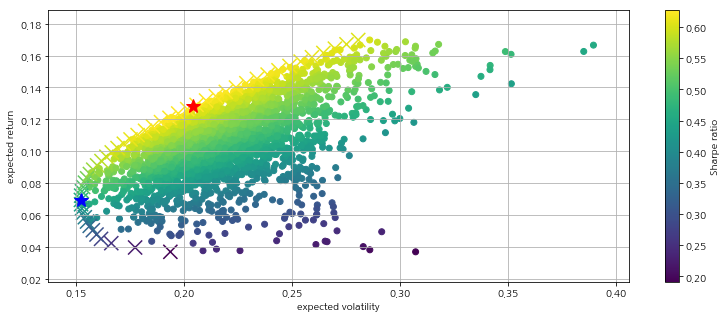

In [23]:
plt.figure(figsize=(13, 5))                                                          # 주어진 수익률 수준에 대한 최소위험 포트폴리오
plt.scatter(pvols, prets, c = prets / pvols, marker='o')                             # 무작위 포트폴리오
plt.scatter(tvols, trets, c = trets / tvols, marker='x', s=200)                      # 효율적 투자선(최소 포트폴리오 보다 수익이 높은 점들)
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0], 'r*', markersize=15.0)  # 빨간점 : 최대 샤프지수의 포트폴리오
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], 'b*', markersize=15.0)  # 파란점 : 최소 분산 포트폴리오
plt.grid(True)
plt.colorbar(label='Sharpe ratio')
plt.xlabel('expected volatility')
plt.ylabel('expected return')

<br><br>
### **07 효율적 투자선 Spline의 함수화**
import scipy.interpolate as sci

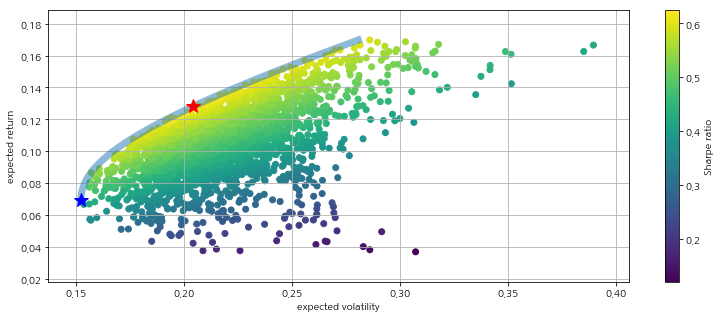

In [29]:
import scipy.interpolate as sci

ind          = np.argmin(tvols)
evols, erets = tvols[ind:], trets[ind:]
tck          = sci.splrep(evols, erets)

# 효율적 투자선 함수 (스플라인 근사)
def f(x): return sci.splev(x, tck, der=0)  # cf) der=1 : 1차 도함수

plt.figure(figsize=(13, 5))
plt.scatter(pvols, prets, c = prets / pvols, marker='o') # 무작위 포트폴리오
plt.plot(evols, f(evols), lw=7, alpha=0.5)    
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0], 'r*', markersize=15.0)  # 빨간점 : 최대 샤프지수의 포트폴리오
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], 'b*', markersize=15.0)  # 파란점 : 최소 분산 포트폴리오
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.grid(True); plt.show()

<br><br>
### <strong>08 자본시장선
투자자산을 **'무위험자산(국채)'** 와 같이 고려하면 투자가능한 효율적 투자기회 집합은 크게 늘어난다
1. **위험 자산으로 구성된 효율적 포트폴리오** 를 결정한 다음 <strong>무위험 자산을 추가</strong>한다
1. 무위험 자산의 비중을 조정하면, <strong>위험-수익률 집합</strong> 중 하나를 선택 가능하다
1. 최적의 투자조건 : <strong>무위험 자산의 위험-수익률</strong>을 지나면서, <strong>효율적 투자선</strong>에 접하는 접선의 포트폴리오

In [45]:
def df(x):
    ''' 효율적 투자선 함수의 1차 도함수 '''
    return sci.splev(x, tck, der=1)

def equations(p, rf=0.03):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

opt = sco.fsolve(equations, [0.01, 1.0, 0.1])
opt

/home/markbaum/Python/django/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


array([0.03      , 3.53871689, 0.15265744])

In [46]:
np.round(equations(opt), 6)

array([ 0.      ,  0.49536 , -0.075937])

Text(0,0.5,'expected return')

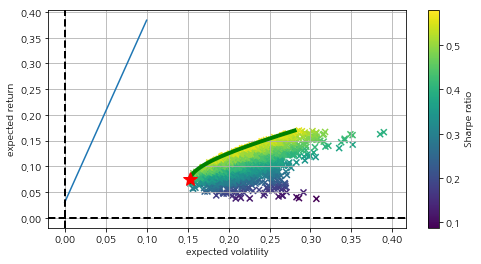

In [49]:
# Visualization
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c=(prets-0.01)/pvols, marker='x') # 위험-수익률 공간의 '사프지수'를 표현 
plt.plot(evols, erets, 'g', lw=4.0)                         # 효율적 투자선

cx = np.linspace(0.0, 0.1)                                  # 0. ~ .3 : 확인을 요하는 구간          
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5)                  # 자본시장선
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0)          # 무위험 자산(0.01)을 지나면서 효율적 투자선에 접하는 점
plt.grid(True)                            ; plt.colorbar(label='Sharpe ratio')
plt.axhline(0, color='k', ls='--', lw=2.0); plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')         ; plt.ylabel('expected return')

In [50]:
# 위에서 예측한 최적 포트폴리오 비중을 출력
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
res = sco.minimize(min_func_port, len(data.columns) * [1./len(data.columns), ], method='SLSQP',
                   bounds = bnds, constraints = cons)
res['x'].round(3)

array([0.146, 0.072, 0.023, 0.759])

In [1]:
%matplotlib inline
from numpy import nan
from pandas import (DataFrame, date_range)
import matplotlib.pyplot as plt
from alphalens.tears import (create_returns_tear_sheet,
                      create_information_tear_sheet,
                      create_turnover_tear_sheet,
                      create_summary_tear_sheet,
                      create_full_tear_sheet,
                      create_event_returns_tear_sheet,
                      create_event_study_tear_sheet)
from alphalens.utils import get_clean_factor_and_forward_returns

/home/markbaum/Python/django/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,A,B,C,D,E,F
date,,,,,,
2015-01-10,1.002500,1.005000,1.0,0.995000,1.005000,1.0
2015-01-11,1.005006,1.010025,1.0,0.990025,1.010025,1.0
2015-01-12,1.007519,1.015075,1.0,0.985075,1.015075,1.0


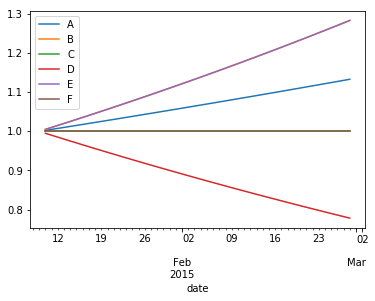

In [8]:
# build price
price_index = date_range(start='2015-1-10', end='2015-2-28')
price_index.name = 'date'
tickers = ['A', 'B', 'C', 'D', 'E', 'F']
data = [[1.0025**i, 1.005**i, 1.00**i, 0.995**i, 1.005**i, 1.00**i]
        for i in range(1, 51)]

prices = DataFrame(index=price_index, columns=tickers, data=data)
prices.plot()
prices.head(3)

In [9]:
# build price
price_index = date_range(start='2015-1-10', end='2015-2-28')
price_index.name = 'date'
tickers = ['A', 'B', 'C', 'D', 'E', 'F']
data = [[1.0025**i, 1.005**i, 1.00**i, 0.995**i, 1.005**i, 1.00**i]
        for i in range(1, 51)]
prices = DataFrame(index=price_index, columns=tickers, data=data)

# build factor
factor_index = date_range(start='2015-1-15', end='2015-2-13')
factor_index.name = 'date'
factor = DataFrame(index=factor_index, columns=tickers,
                   data=[[3, 4, 2, 1, nan, nan], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2]]).stack()
factor_groups = {'A': 'Group1', 'B': 'Group2', 'C': 'Group1', 'D': 'Group2', 'E': 'Group1', 'F': 'Group2'}
factor.head(3)

date         
2015-01-15  A    3.0
            B    4.0
            C    2.0
dtype: float64

In [11]:
factor_data = get_clean_factor_and_forward_returns(
                factor,
                prices,
                groupby       = factor_groups,
                quantiles     = 4,
                periods       = (1, 3), 
                filter_zscore = None)

factor_data.head(10)

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D        3D  factor   group  factor_quantile
date       asset                                                   
2015-01-15 A      0.0025  0.007519     3.0  Group1                3
           B      0.0050  0.015075     4.0  Group2                4
           C      0.0000  0.000000     2.0  Group1                2
           D     -0.0050 -0.014925     1.0  Group2                1
2015-01-16 A      0.0025  0.007519     3.0  Group1                3
           D     -0.0050 -0.014925     1.0  Group2                1
           E      0.0050  0.015075     4.0  Group1                4
           F      0.0000  0.000000     2.0  Group2                2
2015-01-17 A      0.0025  0.007519     3.0  Group1                3
           B      0.0050  0.015075     4.0  Group2                4